# HW2

## Kuan Huang

In [74]:
# import the necessary libraries
import math
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# displays output inline
%matplotlib inline

# Data Preprocessing

In [76]:
# use MNIST digits classification dataset
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(in_train, out_train), (in_valid, out_valid) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [77]:
# 60,000 training images, each image is a grayscale image with size 28x28 pixels
# 10,000 testing images, each image is a grayscale image with size 28x28 pixels
# 10 total categories and each label is assigned a number between 0 and 9
in_train.shape, in_valid.shape, np.unique(out_train)

((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [78]:
# scale the values between 0 and 1 for both training and validation sets
in_train = in_train / 255.0
in_valid = in_valid / 255.0

In [79]:
# define ten categories from 0 to 9
class_names = {index:cn for index, cn in enumerate(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])}

# Training Set

In [80]:
#Prompt the user "How many rows of training images would you like to review?" 
#and output corresponding number of rows with ten images on each row. 
num = int(input("How many rows of training images would you like to review?"))

How many rows of training images would you like to review?5


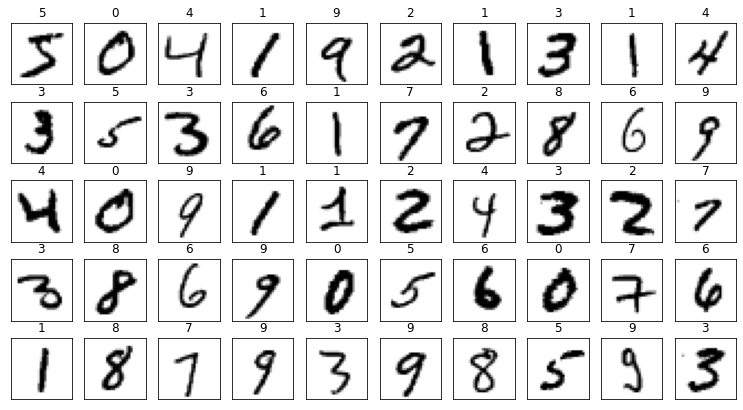

In [81]:
def plot(images, labels, predictions=None):
    # create a grid with 10 columns
    # num is the number of rows
    n_cols = min(10, len(images))
    n_rows = num
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols + 3, n_rows + 2))
    if predictions is None:
        predictions = [None] * len(labels)
    for index, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[index]
        ax.imshow(x, cmap=plt.cm.binary)
        ax.set_title(class_names[y_true])
        if y_pred is not None:
            ax.set_xlabel(class_names[y_pred])
        ax.set_xticks([])
        ax.set_yticks([])

# plot first 10 * num images
plot(in_train[:10*num], out_train[:10*num])   

# Model in Keras

##Set1

In [82]:
#Set 1
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)), #original: (28,28)
    keras.layers.Dense(128, activation="relu"), #original: (130)
    keras.layers.Dense(10, activation="softmax") #original: (10)
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(in_train, out_train, batch_size=80, epochs=20, validation_split=0.25)
#original: batch_size=60, epochs=10, validation_split=0.2

Epoch 1/20
563/563 [==============================] - 3s 5ms/step - loss: 0.3508 - accuracy: 0.9036 - val_loss: 0.2068 - val_accuracy: 0.9420
Epoch 2/20
563/563 [==============================] - 2s 4ms/step - loss: 0.1652 - accuracy: 0.9530 - val_loss: 0.1503 - val_accuracy: 0.9585
Epoch 3/20
563/563 [==============================] - 3s 5ms/step - loss: 0.1187 - accuracy: 0.9659 - val_loss: 0.1305 - val_accuracy: 0.9619
Epoch 4/20
563/563 [==============================] - 2s 4ms/step - loss: 0.0909 - accuracy: 0.9737 - val_loss: 0.1210 - val_accuracy: 0.9645
Epoch 5/20
563/563 [==============================] - 3s 5ms/step - loss: 0.0720 - accuracy: 0.9791 - val_loss: 0.1059 - val_accuracy: 0.9694
Epoch 6/20
563/563 [==============================] - 3s 4ms/step - loss: 0.0584 - accuracy: 0.9834 - val_loss: 0.1039 - val_accuracy: 0.9711
Epoch 7/20
563/563 [==============================] - 2s 4ms/step - loss: 0.0486 - accuracy: 0.9859 - val_loss: 0.0967 - val_accuracy: 0.9723
Epoch 

In [83]:
loss, accuracy = model.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9784


For Set 1, the highest accuracy is 0.9756, the other metrics of this set is as following:

Epoch 20/20

loss: 0.0036 - accuracy: 0.9997 - val_loss: 0.1049 - val_accuracy: 0.9756

##Set 2

In [ ]:
#Set 2
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)), #Set1: (28,28)
    keras.layers.Dense(126, activation="relu"), #Set1: (128)
    keras.layers.Dense(10, activation="softmax") #Set1: (10)
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(in_train, out_train, batch_size=70, epochs=20, validation_split=0.25)
#Set1: batch_size=80, epochs=20, validation_split=0.25

Epoch 1/20
643/643 [==============================] - 4s 6ms/step - loss: 0.3445 - accuracy: 0.9039 - val_loss: 0.2086 - val_accuracy: 0.9416
Epoch 2/20
643/643 [==============================] - 3s 5ms/step - loss: 0.1577 - accuracy: 0.9539 - val_loss: 0.1485 - val_accuracy: 0.9582
Epoch 3/20
643/643 [==============================] - 3s 5ms/step - loss: 0.1122 - accuracy: 0.9672 - val_loss: 0.1255 - val_accuracy: 0.9631
Epoch 4/20
643/643 [==============================] - 3s 4ms/step - loss: 0.0856 - accuracy: 0.9750 - val_loss: 0.1145 - val_accuracy: 0.9657
Epoch 5/20
643/643 [==============================] - 5s 8ms/step - loss: 0.0676 - accuracy: 0.9802 - val_loss: 0.1060 - val_accuracy: 0.9677
Epoch 6/20
643/643 [==============================] - 3s 5ms/step - loss: 0.0550 - accuracy: 0.9840 - val_loss: 0.0990 - val_accuracy: 0.9706
Epoch 7/20
643/643 [==============================] - 3s 5ms/step - loss: 0.0446 - accuracy: 0.9877 - val_loss: 0.1185 - val_accuracy: 0.9649
Epoch 

In [ ]:
loss, accuracy = model.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9786


For Set 2, the highest accuracy is 0.9769, the other metrics of this set is as following:

Epoch 20/20

loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.1034 - val_accuracy: 0.9769

##Set 3

In [ ]:
#Set 3
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)), #Set2(28,28)
    keras.layers.Dense(128, activation="relu"), #Set2: (126)
    keras.layers.Dense(10, activation="softmax") #Set2: (10)
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(in_train, out_train, batch_size=70, epochs=12, validation_split=0.07)
#Set2: batch_size=70, epochs=20, validation_split=0.25

Epoch 1/12
798/798 [==============================] - 3s 4ms/step - loss: 0.3187 - accuracy: 0.9106 - val_loss: 0.1364 - val_accuracy: 0.9622
Epoch 2/12
798/798 [==============================] - 3s 3ms/step - loss: 0.1428 - accuracy: 0.9589 - val_loss: 0.1063 - val_accuracy: 0.9702
Epoch 3/12
798/798 [==============================] - 3s 4ms/step - loss: 0.1006 - accuracy: 0.9703 - val_loss: 0.0817 - val_accuracy: 0.9781
Epoch 4/12
798/798 [==============================] - 3s 4ms/step - loss: 0.0754 - accuracy: 0.9778 - val_loss: 0.0816 - val_accuracy: 0.9755
Epoch 5/12
798/798 [==============================] - 3s 4ms/step - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.0680 - val_accuracy: 0.9798
Epoch 6/12
798/798 [==============================] - 3s 4ms/step - loss: 0.0480 - accuracy: 0.9860 - val_loss: 0.0726 - val_accuracy: 0.9807
Epoch 7/12
798/798 [==============================] - 3s 4ms/step - loss: 0.0390 - accuracy: 0.9890 - val_loss: 0.0737 - val_accuracy: 0.9788
Epoch 

In [ ]:
loss, accuracy = model.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9747


For Set 3, the highest accuracy is 0.9805, the other metrics of this set is as following:

Epoch 7/12

loss: 0.0407 - accuracy: 0.9885 - val_loss: 0.0680 - val_accuracy: 0.9805

##Set 4

In [ ]:
#Set 4
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)), #Set3: (28,28)
    keras.layers.Dense(128, activation="relu"), #Set3: (128)
    keras.layers.Dense(10, activation="softmax") #Set3: (10)
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(in_train, out_train, batch_size=90, epochs=30, validation_split=0.06)
#Set3: batch_size=70, epochs=12, validation_split=0.07

Epoch 1/30
627/627 [==============================] - 3s 4ms/step - loss: 0.3385 - accuracy: 0.9053 - val_loss: 0.1487 - val_accuracy: 0.9647
Epoch 2/30
627/627 [==============================] - 2s 4ms/step - loss: 0.1595 - accuracy: 0.9539 - val_loss: 0.1046 - val_accuracy: 0.9714
Epoch 3/30
627/627 [==============================] - 3s 4ms/step - loss: 0.1126 - accuracy: 0.9683 - val_loss: 0.0940 - val_accuracy: 0.9744
Epoch 4/30
627/627 [==============================] - 3s 4ms/step - loss: 0.0866 - accuracy: 0.9746 - val_loss: 0.0842 - val_accuracy: 0.9769
Epoch 5/30
627/627 [==============================] - 2s 4ms/step - loss: 0.0687 - accuracy: 0.9797 - val_loss: 0.0756 - val_accuracy: 0.9786
Epoch 6/30
627/627 [==============================] - 2s 4ms/step - loss: 0.0558 - accuracy: 0.9838 - val_loss: 0.0902 - val_accuracy: 0.9717
Epoch 7/30
627/627 [==============================] - 3s 4ms/step - loss: 0.0465 - accuracy: 0.9866 - val_loss: 0.0716 - val_accuracy: 0.9811
Epoch 

In [ ]:
loss, accuracy = model.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0972 - accuracy: 0.9803


For Set 4, the highest accuracy is 0.9839, the other metrics of this set is as following

Epoch 13/30

loss: 0.0146 - accuracy: 0.9965 - val_loss: 0.0665 - val_accuracy: 0.9839

##Set 5

In [ ]:
#Set 5
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)), #Set4: (28,28)
    keras.layers.Dense(130, activation="relu"), #Set4: (128)
    keras.layers.Dense(10, activation="softmax") #Set4: (10)
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(in_train, out_train, batch_size=110, epochs=40, validation_split=0.04)
#Set4: batch_size=90, epochs=30, validation_split=0.06

Epoch 1/40
524/524 [==============================] - 3s 5ms/step - loss: 0.3531 - accuracy: 0.9032 - val_loss: 0.1394 - val_accuracy: 0.9642
Epoch 2/40
524/524 [==============================] - 2s 4ms/step - loss: 0.1667 - accuracy: 0.9517 - val_loss: 0.0966 - val_accuracy: 0.9767
Epoch 3/40
524/524 [==============================] - 2s 4ms/step - loss: 0.1189 - accuracy: 0.9663 - val_loss: 0.0900 - val_accuracy: 0.9762
Epoch 4/40
524/524 [==============================] - 2s 4ms/step - loss: 0.0938 - accuracy: 0.9732 - val_loss: 0.0812 - val_accuracy: 0.9783
Epoch 5/40
524/524 [==============================] - 2s 4ms/step - loss: 0.0743 - accuracy: 0.9788 - val_loss: 0.0808 - val_accuracy: 0.9800
Epoch 6/40
524/524 [==============================] - 2s 4ms/step - loss: 0.0608 - accuracy: 0.9827 - val_loss: 0.0788 - val_accuracy: 0.9792
Epoch 7/40
524/524 [==============================] - 2s 4ms/step - loss: 0.0512 - accuracy: 0.9848 - val_loss: 0.0697 - val_accuracy: 0.9808
Epoch 

In [ ]:
loss, accuracy = model.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.1187 - accuracy: 0.9751


For Set 5, the highest accuracy is 0.9867, the other metrics of this set is as following

Epoch 27/40: 

loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.1007 - val_accuracy: 0.9867

##Conclusion
Set 5 has the highest accuracy in the 5 sets. The highest accuracy is 0.9867.

# Validation Set

In [ ]:
# predict the validation set
probs = model.predict(in_valid)
print(probs.argmax(axis=1))
# another way to do the same thing
preds = model.predict(in_valid).argsort()[:,-1]
print(preds)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


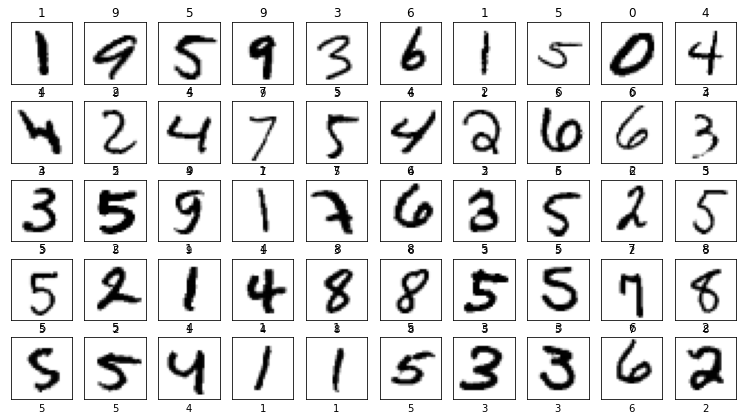

In [ ]:
# plot (10 * num) random data
rand_idxs = np.random.permutation(len(in_valid))[:10 * num]
plot(in_valid[rand_idxs], out_valid[rand_idxs], preds[rand_idxs])

# Application

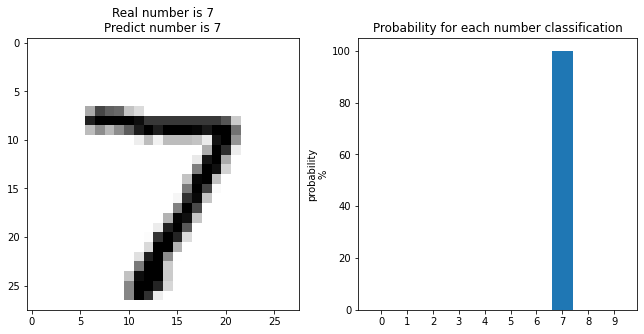

In [ ]:
from ipywidgets import interact, widgets
#Add caption to note how to use this application
caption = widgets.Label(value='move the circle button to change the image index')
#Make sure the caption is above the chart
display(caption)
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_valid) - 1, description="Image index")
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
    ax1.imshow(in_valid[index], cmap=plt.cm.binary)
    #Make 'REAL NUMBER' and 'PREDICT NUMBER' on title together to make it be more clearly shown, and make sure they are in same font.
    ax1.set_title("Real number is %s\n" % class_names[out_valid[index]]+"Predict number is %s" % class_names[preds[index]])
    ax2.bar(x=[class_names[index] for index in range(10)], height=probs[index]*100)
    #Add title for the bar chart.
    ax2.set_title("Probability for each number classification")
    #Add y axis label for the bar chart
    ax2.set_ylabel("probability\n%")
    #rotate the x labels to make it easy to read
    plt.xticks(rotation=0)

#There are still some images cannot be easily classified, for example no.4193, no.2016 and no.3951
